## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [2]:
# Use this cell to begin your analysis, and add as many as you would like!
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#import the dataset and view the head. identify the important columns as per task 1.
office_df = pd.read_csv("datasets/office_episodes.csv")
print(office_df.head())
#important columns: episode_number, viewership_mil, ratings, has_guests

   episode_number  season  episode_title  \
0               0       1          Pilot   
1               1       1  Diversity Day   
2               2       1    Health Care   
3               3       1   The Alliance   
4               4       1     Basketball   

                                         description  ratings  votes  \
0  The premiere episode introduces the boss and s...      7.5   4936   
1  Michael's off color remark puts a sensitivity ...      8.3   4801   
2  Michael leaves Dwight in charge of picking the...      7.8   4024   
3  Just for a laugh, Jim agrees to an alliance wi...      8.1   3915   
4  Michael and his staff challenge the warehouse ...      8.4   4294   

   viewership_mil  duration release_date guest_stars         director  \
0            11.2        23   2005-03-24         NaN       Ken Kwapis   
1             6.0        23   2005-03-29         NaN       Ken Kwapis   
2             5.8        22   2005-04-05         NaN  Ken Whittingham   
3         

In [4]:
#filer the dataset to include only the 'important' columns
trim_office = office_df[['episode_number', 'viewership_mil', 'scaled_ratings', 'has_guests']]
print(trim_office.head(10))

   episode_number  viewership_mil  scaled_ratings  has_guests
0               0           11.20         0.28125       False
1               1            6.00         0.53125       False
2               2            5.80         0.37500       False
3               3            5.40         0.46875       False
4               4            5.00         0.56250       False
5               5            4.80         0.34375        True
6               6            9.00         0.65625       False
7               7            7.13         0.50000       False
8               8            8.30         0.56250        True
9               9            7.60         0.56250        True


In [5]:
#set up colour scheme
colours = []

#can do this by iterating over the dataset trim_office
for index, row in list(trim_office.iterrows()):
    if row['scaled_ratings'] < 0.25:
        colours.append("red")
    elif row['scaled_ratings'] >= 0.25 and row['scaled_ratings'] < 0.5:
        colours.append("orange")
    elif row['scaled_ratings'] >= 0.5 and row['scaled_ratings'] < 0.75:
        colours.append("lightgreen")
    elif row['scaled_ratings'] >= 0.75:
        colours.append("darkgreen")
        
#inspect colours... just in case
print(colours[0:10])

['orange', 'lightgreen', 'orange', 'orange', 'lightgreen', 'orange', 'lightgreen', 'orange', 'lightgreen', 'lightgreen']


In [6]:
#implement sizing system. add new column to office_trim, later? - if guest_appearances = True, add 250 to column. if false, add 50.
sizing_system_list = []

#print(trim_office.head(10))

for index, row in trim_office.iterrows():
    if row["has_guests"] == True:
        sizing_system_list.append(250)
    else:
        sizing_system_list.append(25)


print(sizing_system_list[0:10])

[25, 25, 25, 25, 25, 250, 25, 25, 250, 250]


In [7]:
print(trim_office[70:80])
print(office_df[77:78])

    episode_number  viewership_mil  scaled_ratings  has_guests
70              70            8.35         0.59375       False
71              71            8.18         0.50000       False
72              72            8.40         0.62500       False
73              73            8.33         0.68750       False
74              74            8.79         0.56250       False
75              75            8.50         0.65625       False
76              76            8.74         0.43750       False
77              77           22.91         0.96875        True
78              78            8.39         0.50000       False
79              79            8.89         0.46875       False
    episode_number  season  episode_title  \
77              77       5  Stress Relief   

                                          description  ratings  votes  \
77  Dwight's too-realistic fire alarm gives Stanle...      9.7   8170   

    viewership_mil  duration release_date  \
77           22.91      

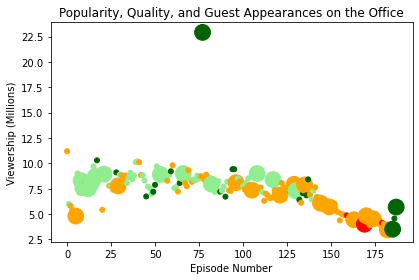

In [8]:
#begin visualisation
fig = plt.figure()
plt.rcParams['figure.figsize'] = [15, 7]


plt.scatter(trim_office['episode_number'],trim_office['viewership_mil'], color=colours, s=sizing_system_list
           )
plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")

plt.show()

In [9]:
#Task 2: 
#Provide the name of one of the guest stars (hint, there were multiple!) who was in the most watched Office episode. Save it as 
#a string in the variable top_star (e.g. top_star = "Will Ferrell").

In [10]:
print(trim_office[70:80])
print(office_df[77:78]["guest_stars"])

    episode_number  viewership_mil  scaled_ratings  has_guests
70              70            8.35         0.59375       False
71              71            8.18         0.50000       False
72              72            8.40         0.62500       False
73              73            8.33         0.68750       False
74              74            8.79         0.56250       False
75              75            8.50         0.65625       False
76              76            8.74         0.43750       False
77              77           22.91         0.96875        True
78              78            8.39         0.50000       False
79              79            8.89         0.46875       False
77    Cloris Leachman, Jack Black, Jessica Alba
Name: guest_stars, dtype: object


In [11]:
top_star = "Jessica Alba"

In [12]:
#Bonus Step!
#Although it was not taught in Intermediate Python, a useful skill for visualizing different data points is to use a different 
#marker. You can learn more about them via the Matplotlib documentation or via our course Introduction to Data Visualization 
#with Matplotlib. Thus, as a bonus step, try to differentiate guest appearances not just with size, but also with a star!

#All other attributes still apply (data on the axes, color scheme, sizes for guest appearances, title, and axis labels).

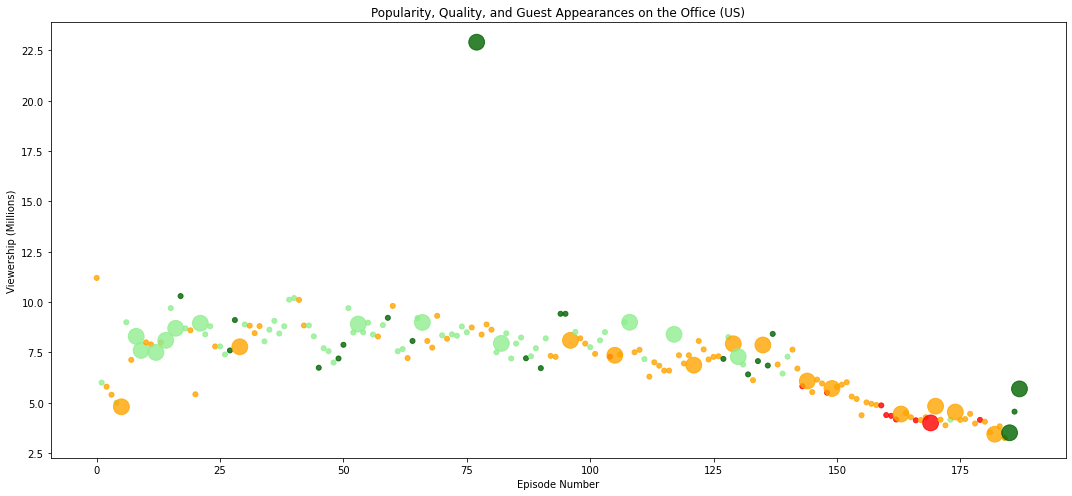

In [13]:
#In this figure, I use sizing_system_list, generated earlier, to enlarge the episode points with guest stars. the transparency
#is adjusted so points can still be seen if they overlap.
fig2 = plt.figure()

plt.rcParams['figure.figsize'] = [15, 7]


plt.scatter(trim_office['episode_number'],trim_office['viewership_mil'], color=colours, s = sizing_system_list, alpha=0.8
           )
plt.title("Popularity, Quality, and Guest Appearances on the Office (US)")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")

plt.show()

In [14]:
star_or_not = []

for x in sizing_system_list:
    if x == 250:
        star_or_not.append(True)
    else:
        star_or_not.append(False)
        
print(star_or_not[0:10])

[False, False, False, False, False, True, False, False, True, True]


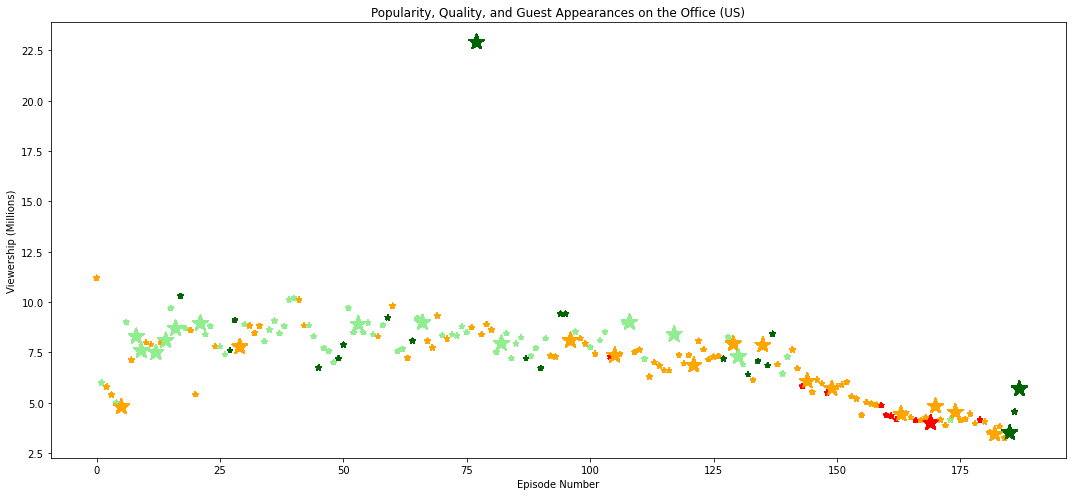

In [16]:
plt.rcParams['figure.figsize'] = [15, 7]

for i in range(len(trim_office)):
    if star_or_not == False:
        plt.scatter(trim_office['episode_number'],trim_office['viewership_mil'], color=colours, s = sizing_system_list, 
                    alpha=0.8) 
    else:
        plt.scatter(trim_office['episode_number'],trim_office['viewership_mil'], color=colours, marker = '*', s = sizing_system_list, 
                    alpha=0.8)
    
plt.title("Popularity, Quality, and Guest Appearances on the Office (US)")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")

plt.show()